In [1]:
from PIL import Image
import numpy as np
import nevergrad as ng
import matplotlib.pyplot as plt

In [2]:
# !dir

In [3]:
# Via https://stackoverflow.com/a/7769424/10940584
def load_image( infilename, scale=0.05) :
#     img = Image.open( open(infilename, 'rb') )
    img = Image.open(infilename)
    img.load()
    data = np.asarray( img.resize(tuple((np.array(img.size) * scale).round().astype(int))), dtype="int32" )
    return data

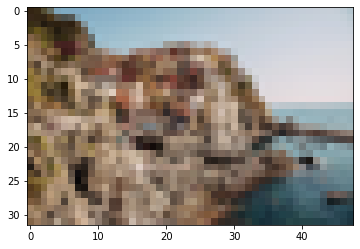

In [4]:
image_data = (load_image('test-image.jpg')/255).astype(float)#.mean(axis=2)
plt.imshow(image_data, cmap='inferno')

In [5]:
# ng.optimizers.NGOpt13

In [6]:
image_data.shape

(32, 48, 3)

In [20]:
plt.close('all')
ih, iw = image_data.shape[:2]
w, h = (5,)*2
limit = np.array([ih-float(w), iw-float(h)])
print(limit.dtype)
swatches = 300
positions = np.random.randint(0, limit, [swatches, 2])
color_init = np.random.uniform(-0.1, 0.1, [swatches, 3])

patch = np.random.uniform(-1., 1., [w, h, 3])

float64


In [29]:
def generate(zx, zy, z2):
    zx = np.array(zx)
    zy = np.array(zy)
    c = np.zeros_like(image_data, dtype=float)
#     Explicitly indexing the position array seems to alleviate the random kernel crashes
    for p in range(zx.shape[0]):
#         x, y = tuple(p.astype(int))
#         x, y = tuple(z1[p])
        x = zx[p]
        y = zy[p]
        x = round(x)
        y = round(y)
        g = z2[p]
#         print(x, y, x+w, y+h, c[x:x+w, y:y+h].shape, g.shape, g.dtype)
        c[x:x+w, y:y+h] += g#+= patch
#     return np.clip(c, 0., 1.)
    return c
    
def loss(qx:np.ndarray, qy:np.ndarray, q2:np.ndarray, noisy=True) -> float:
    canvas = generate(qx, qy, q2)
#     print(canvas.shape)
    d = np.mean((canvas - image_data) ** 2)
#     d = np.mean(np.abs(canvas - image_data))
#     print(d)
    return d

In [34]:
lim = [int(u) for u in limit.astype(int)]
print(lim)

optimizer = ng.optimizers.NGOpt(
# optimizer = ng.optimizers.PortfolioDiscreteOnePlusOne(
# optimizer = ng.optimizers.TwoPointsDE(
#     parametrization=ng.p.Array(init=positions, lower=0., upper=limit),
#     parametrization=ng.p.TransitionChoice(),
    parametrization=ng.p.Instrumentation(
#         ng.p.Array(
#             ng.p.Scalar(),
#             init=positions, lower=0., upper=limit
#         ),
        ng.p.TransitionChoice(lim[0], repetitions=swatches),
        ng.p.TransitionChoice(lim[1], repetitions=swatches),
        ng.p.Array(init=color_init, lower=-1., upper=1., mutable_sigma=False),
#         .set_integer_casting()
    ),
    budget=100
)

# TODO: image composition with cyclic & trigonometric functions

[27, 43]


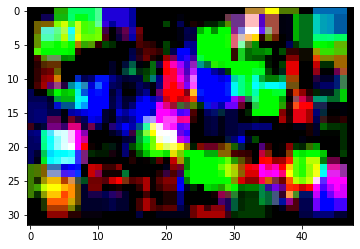

In [35]:
result = optimizer.minimize(generate)
# print(result.value)
# print(loss())
plt.imshow(generate(*result.value[0]), cmap='inferno')

In [18]:
result.value[0][2]

array([[-3.71994732e-02,  6.90024072e-02,  1.27764001e-01],
       [-9.65094707e-02,  4.95087527e-01,  8.04628140e-02],
       [ 1.93233673e-01, -4.79649400e-01, -2.15176331e-01],
       [-5.13908481e-02, -1.80762361e-01, -1.22075143e-02],
       [ 3.05638973e-01, -1.73037923e-01, -4.10128293e-01],
       [ 1.69047420e-01, -1.47434972e-01, -8.27745063e-02],
       [ 4.55225120e-01, -1.83968947e-01, -2.50890586e-01],
       [ 6.27068452e-02, -4.56301321e-02, -1.19094639e-01],
       [ 2.48716233e-02, -4.00747011e-02,  5.30431380e-01],
       [-1.33338587e-01,  2.60198416e-01,  6.76756486e-01],
       [-1.60238654e-02,  1.61677716e-01,  1.84043561e-01],
       [-1.81208349e-02,  1.12673199e-01, -3.01588049e-01],
       [-7.69926913e-02,  6.77946498e-01, -7.70761316e-01],
       [ 1.62945746e-01, -2.97883904e-03,  4.75722767e-01],
       [-7.27412069e-02, -2.35941424e-02,  1.97669859e-01],
       [ 1.55441474e-01, -4.49239928e-01, -1.06139469e-01],
       [ 2.63826980e-01, -4.24738703e-01

In [28]:
generate(*result.value[0]).max()

7 10 12 15 (5, 5, 3) (3,) float64
17 6 22 11 (5, 5, 3) (3,) float64
0 23 5 28 (5, 5, 3) (3,) float64
16 18 21 23 (5, 5, 3) (3,) float64
20 12 25 17 (5, 5, 3) (3,) float64
3 12 8 17 (5, 5, 3) (3,) float64
23 1 28 6 (5, 5, 3) (3,) float64
24 30 29 35 (5, 5, 3) (3,) float64
7 12 12 17 (5, 5, 3) (3,) float64
19 40 24 45 (5, 5, 3) (3,) float64
25 15 30 20 (5, 5, 3) (3,) float64
12 41 17 46 (5, 5, 3) (3,) float64
9 27 14 32 (5, 5, 3) (3,) float64
6 12 11 17 (5, 5, 3) (3,) float64
12 27 17 32 (5, 5, 3) (3,) float64
15 14 20 19 (5, 5, 3) (3,) float64
6 14 11 19 (5, 5, 3) (3,) float64
4 26 9 31 (5, 5, 3) (3,) float64
3 18 8 23 (5, 5, 3) (3,) float64
14 17 19 22 (5, 5, 3) (3,) float64
20 33 25 38 (5, 5, 3) (3,) float64
18 8 23 13 (5, 5, 3) (3,) float64
8 1 13 6 (5, 5, 3) (3,) float64
17 6 22 11 (5, 5, 3) (3,) float64
11 0 16 5 (5, 5, 3) (3,) float64
20 38 25 43 (5, 5, 3) (3,) float64
14 22 19 27 (5, 5, 3) (3,) float64
10 31 15 36 (5, 5, 3) (3,) float64
17 36 22 41 (5, 5, 3) (3,) float64
14 12 19

3.4832572982599856

In [27]:
for i in range(5000):
    loss(np.random.randint(0, limit, [50, 2]))

In [28]:
loss()

130.2323138745891